# Tensorflow-Generative-Model-Collections
Tensorflow implementation of various GANs and VAEs.

### "Are GANs Created Equal? A Large-Scale Study" Paper 
https://github.com/google/compare_gan is the code that was used in [the paper](https://arxiv.org/abs/1711.10337).  
It provides IS/FID and rich experimental results for all gan-variants. 

### Results for mnist
Network architecture of generator and discriminator is the exaclty sames as in [infoGAN paper](https://arxiv.org/abs/1606.03657).  
For fair comparison of core ideas in all gan variants, all implementations for network architecture are kept same except EBGAN and BEGAN. Small modification is made for EBGAN/BEGAN, since those adopt auto-encoder strucutre for discriminator. But I tried to keep the capacity of discirminator.

The following results can be reproduced with command:  
```
python3 main.py --dataset mnist --gan_type <TYPE> --epoch 25 --batch_size 64
```

# Run in Notebook

## Environment Setup

In [1]:
!export DISPLAY=:0

## Imports

In [2]:
import os
import fnmatch

## GAN Variants
from GAN import GAN
from CGAN import CGAN
from infoGAN import infoGAN
from ACGAN import ACGAN
from EBGAN import EBGAN
from WGAN import WGAN
from WGAN_GP import WGAN_GP
from DRAGAN import DRAGAN
from LSGAN import LSGAN
from BEGAN import BEGAN

## VAE Variants
from VAE import VAE
from CVAE import CVAE

from utils import show_all_variables
from utils import check_folder

import tensorflow as tf
import argparse

Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.distributions`.
Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.distributions`.


## Configuration

### Select the type of GAN

In [3]:
#Select the type of GAN. 
#Options = ['GAN', 'CGAN', 'infoGAN', 'ACGAN', 'EBGAN', 'BEGAN', 'WGAN', 'WGAN_GP', 'DRAGAN', 'LSGAN', 'VAE', 'CVAE']
#Default = 'WGAN'
gan_type = 'WGAN'

### Select the Dataset

#### MNIST

In [4]:
#Select Dataset
#Options = ['mnist', 'fashion-mnist', 'celebA']
#Default = 'mnist'
dataset = 'mnist'

In [5]:
!mkdir -p data/mnist
!wget -Nq http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz -P data/mnist
!wget -Nq http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz -P data/mnist
!wget -Nq http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz -P data/mnist
!wget -Nq http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz -P data/mnist

### Select Parameters

In [6]:
epoch = 20
batch_size = 64
z_dim = 62
checkpoint_dir = os.path.relpath('checkpoint')
result_dir = os.path.relpath('results')
log_dir = os.path.relpath('logs')

## Run the Model

In [7]:
tf.reset_default_graph()
models = [GAN, CGAN, infoGAN, ACGAN, EBGAN, WGAN, WGAN_GP, DRAGAN,
              LSGAN, BEGAN, VAE, CVAE]
with tf.Session(config=tf.ConfigProto(allow_soft_placement=True)) as sess: # declare instance for GAN
    gan = None
    for model in models:
        if gan_type == model.model_name:
            gan = model(sess,
                        epoch=epoch,
                        batch_size=batch_size,
                        z_dim=z_dim,
                        dataset_name=dataset,
                        checkpoint_dir=checkpoint_dir,
                        result_dir=result_dir,
                        log_dir=log_dir)
    # build graph
    gan.build_model()

    # show network architecture
    show_all_variables()

    # launch the graph in a session
    gan.train()
    print(" [*] Training finished!")

    # visualize learned generator
    gan.visualize_results(epoch-1)
    print(" [*] Testing finished!")
    

---------
Variables: name (type shape) [size]
---------
discriminator/d_conv1/w:0 (float32_ref 4x4x1x64) [1024, bytes: 4096]
discriminator/d_conv1/biases:0 (float32_ref 64) [64, bytes: 256]
discriminator/d_conv2/w:0 (float32_ref 4x4x64x128) [131072, bytes: 524288]
discriminator/d_conv2/biases:0 (float32_ref 128) [128, bytes: 512]
discriminator/d_bn2/beta:0 (float32_ref 128) [128, bytes: 512]
discriminator/d_bn2/gamma:0 (float32_ref 128) [128, bytes: 512]
discriminator/d_fc3/Matrix:0 (float32_ref 6272x1024) [6422528, bytes: 25690112]
discriminator/d_fc3/bias:0 (float32_ref 1024) [1024, bytes: 4096]
discriminator/d_bn3/beta:0 (float32_ref 1024) [1024, bytes: 4096]
discriminator/d_bn3/gamma:0 (float32_ref 1024) [1024, bytes: 4096]
discriminator/d_fc4/Matrix:0 (float32_ref 1024x1) [1024, bytes: 4096]
discriminator/d_fc4/bias:0 (float32_ref 1) [1, bytes: 4]
generator/g_fc1/Matrix:0 (float32_ref 62x1024) [63488, bytes: 253952]
generator/g_fc1/bias:0 (float32_ref 1024) [1024, bytes: 4096]
gen

## View Result

In [8]:
#Locate result folder
model_result_directory = gan_type + '_' + dataset + '_' + str(batch_size) + '_' + str(z_dim)
result_dir_path = os.path.join(result_dir, model_result_directory)

In [9]:
#Generate list of test_all_classes.png file in results folder
test_all_classes = []
for file in os.listdir(result_dir_path):
    if fnmatch.fnmatch(file, '*_test_all_classes.png'):
        test_all_classes.append(file)

test_all_classes.sort()

#Select last epoch for image results
last_epoch = test_all_classes[-1]
result_image = os.path.join(result_dir_path,last_epoch)

WGAN_epoch019_test_all_classes.png


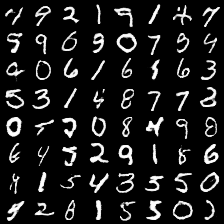

In [10]:
#Display Image
from IPython.display import Image
print(last_epoch)
Image(filename=result_image, height=300, width=300) 

# End Run in Notebook

### Results for fashion-mnist
Comments on network architecture in mnist are also applied to here.  
[Fashion-mnist](https://github.com/zalandoresearch/fashion-mnist) is a recently proposed dataset consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. (T-shirt/top, Trouser, Pullover, Dress, Coat, Sandal, Shirt, Sneaker, Bag, Ankle boot)

The following results can be reproduced with command:  
```
python3 main.py --dataset fashion-mnist --gan_type <TYPE> --epoch 40 --batch_size 64
```